# Customer Segmentation (K-Mean Clustering)
We used K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import display, HTML

In [2]:
# Load the data
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Data exploration
print("Data Exploration:")
display(df.head())
print("\nShape of the dataset:", df.shape)
print("\nInfo about the dataset:")
df_info = df.info()
display(HTML(df_info))
print("\nNumber of duplicated rows:", df.duplicated().sum())
print("\nDescriptive statistics:")
display(df.describe())

Data Exploration:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Shape of the dataset: (200, 5)

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<IPython.core.display.HTML object>


Number of duplicated rows: 0

Descriptive statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Exploration and Visualization
Plot pairwise relationships between features in a dataset.

<Figure size 1152x720 with 0 Axes>

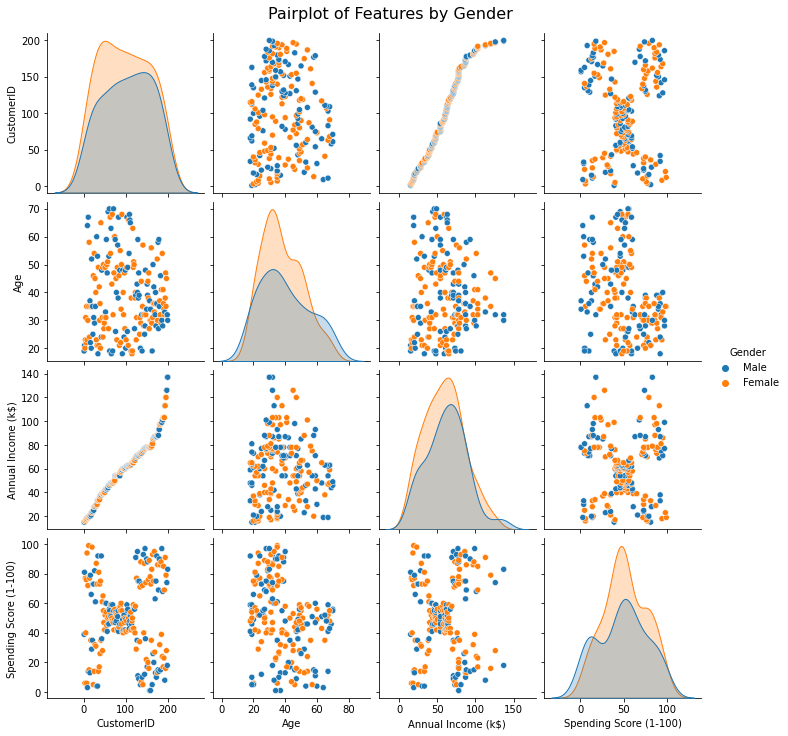

In [4]:
# Visualizing data distributions
plt.figure(figsize=(16, 10))
sns.pairplot(data=df, hue='Gender')
plt.suptitle('Pairplot of Features by Gender', y=1.02, fontsize=16)
plt.show()

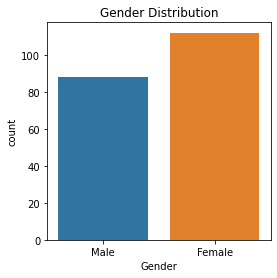

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

### Distribution of numerical features (Age, Annual income & Spending score)

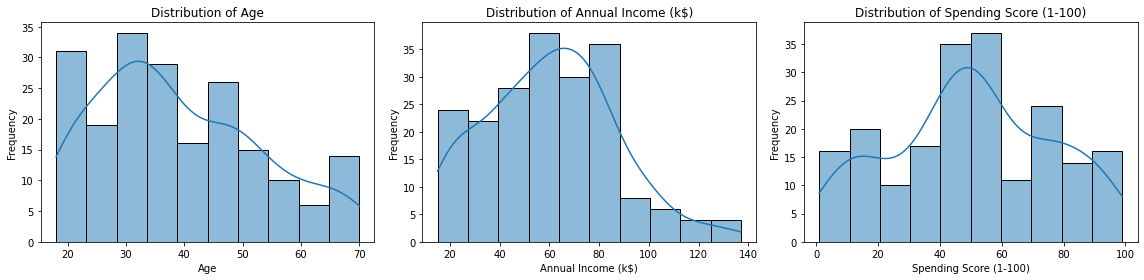

In [6]:
plt.figure(figsize=(16, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Clustering using K-means (ML Model)
#### Application in this use-case:
Let's perform clustering (optimizing K with the elbow method). In order to simplify the problem, we start by keeping only the two last columns as features.
##### Optimal K: the elbow method
How many clusters would you choose ?

A common, empirical method, is the elbow method. You plot the mean distance of every point toward its cluster center, as a function of the number of clusters.

Sometimes the plot has an arm shape, and the elbow would be the optimal K.

In [7]:
# Clustering
X = df.iloc[:, -3:]

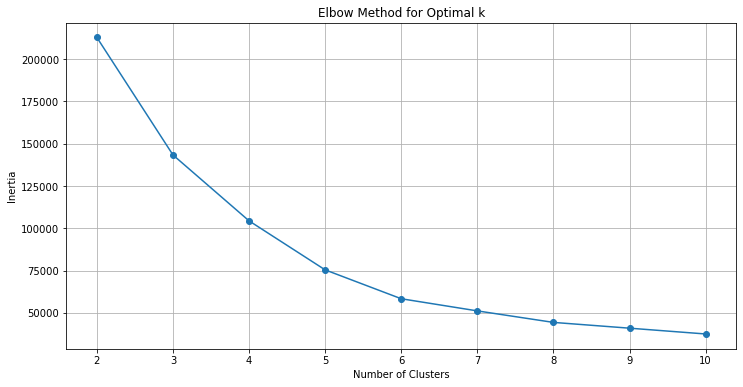

In [8]:
# Elbow Method to find optimal k
inertias = []
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

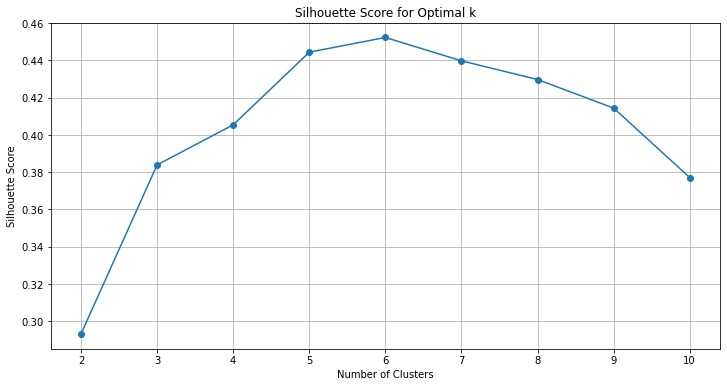

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [10]:
# Performing KMeans with optimal k
optimal_k = 5
km = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = km.fit_predict(X)

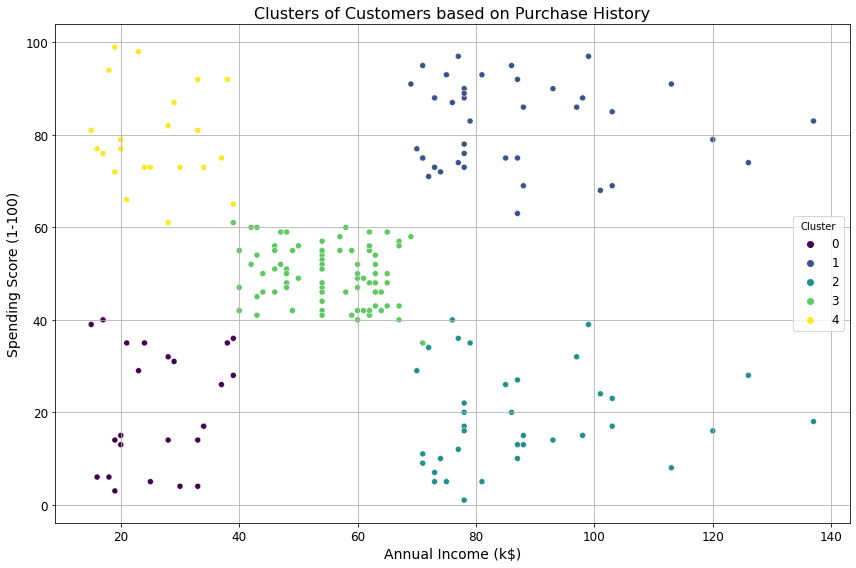

In [11]:
# Visualizing Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Clusters of Customers based on Purchase History', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Analyzing Clusters
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index
cluster_centers['Cluster'] = cluster_centers['Cluster'].apply(lambda x: f'Cluster {x}')

In [13]:
print("Cluster Centers:")
display(cluster_centers)

Cluster Centers:


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,45.217391,26.304348,20.913043,Cluster 0
1,32.692308,86.538462,82.128205,Cluster 1
2,40.324324,87.432432,18.189189,Cluster 2
3,43.126582,54.822785,49.835443,Cluster 3
4,25.272727,25.727273,79.363636,Cluster 4


### Definition of customers profiles corresponding to each clusters

In [14]:
# Number of customers in each cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nNumber of Customers in Each Cluster:")
display(cluster_sizes)


Number of Customers in Each Cluster:


0    23
1    39
2    37
3    79
4    22
Name: Cluster, dtype: int64

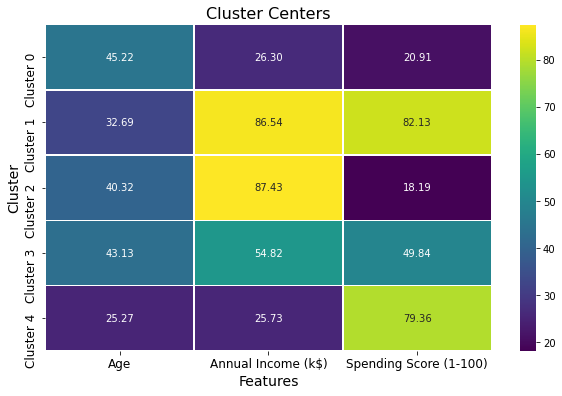

In [15]:
# Visualizing cluster centers in tabular form
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers.set_index('Cluster'), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Cluster Centers', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Cluster', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

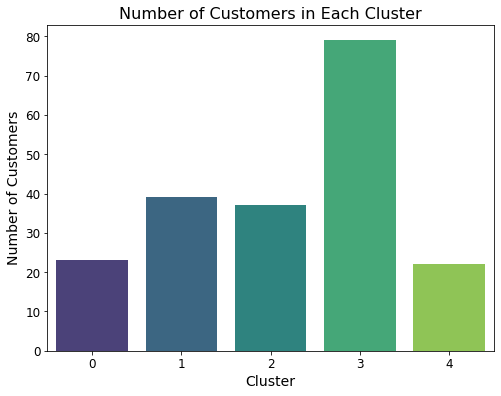

In [16]:
# Visualizing number of customers in each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Number of Customers in Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()